In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
data=pd.read_csv('apple_stock.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2014,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,1/3/2014,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,1/6/2014,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,1/7/2014,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,1/8/2014,19.243214,19.484285,19.238930,19.409287,17.015959,258529600
...,...,...,...,...,...,...,...
2470,10/25/2023,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,10/26/2023,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,10/27/2023,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,10/30/2023,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707499,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2470    False
2471    False
2472    False
2473    False
2474    False
Length: 2475, dtype: bool

In [8]:
data['Date']=pd.to_datetime(data['Date'])

# **Data Visualization**

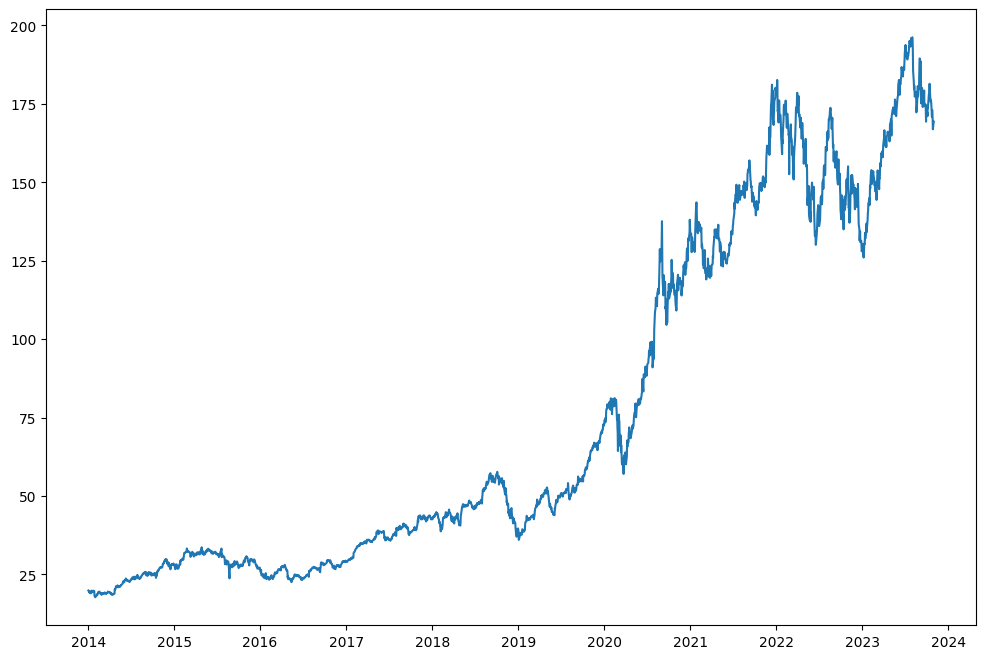

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Open'])
plt.show()

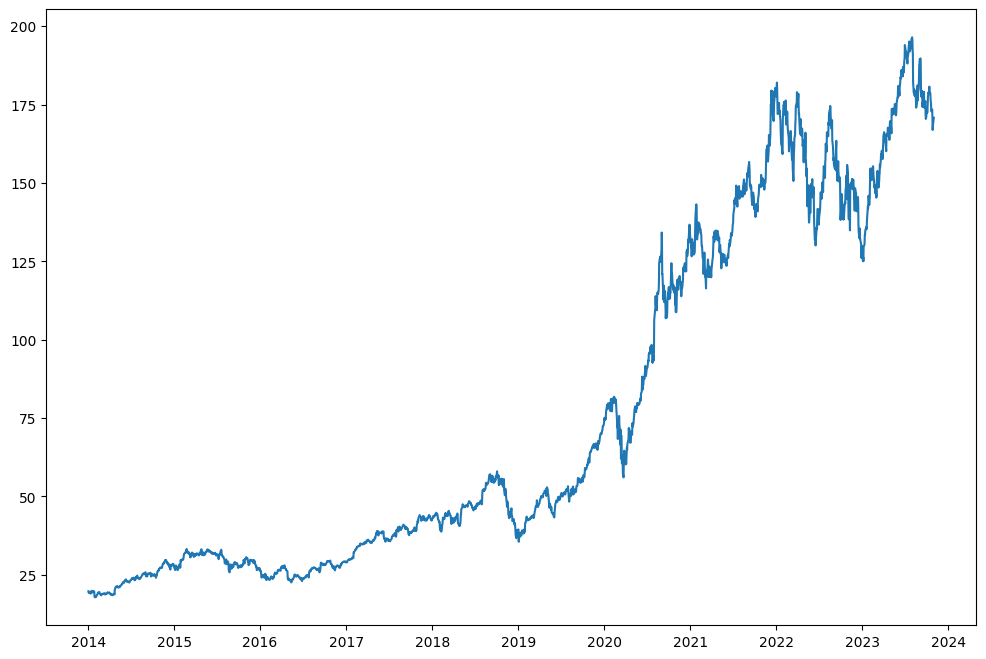

In [12]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'])
plt.show()

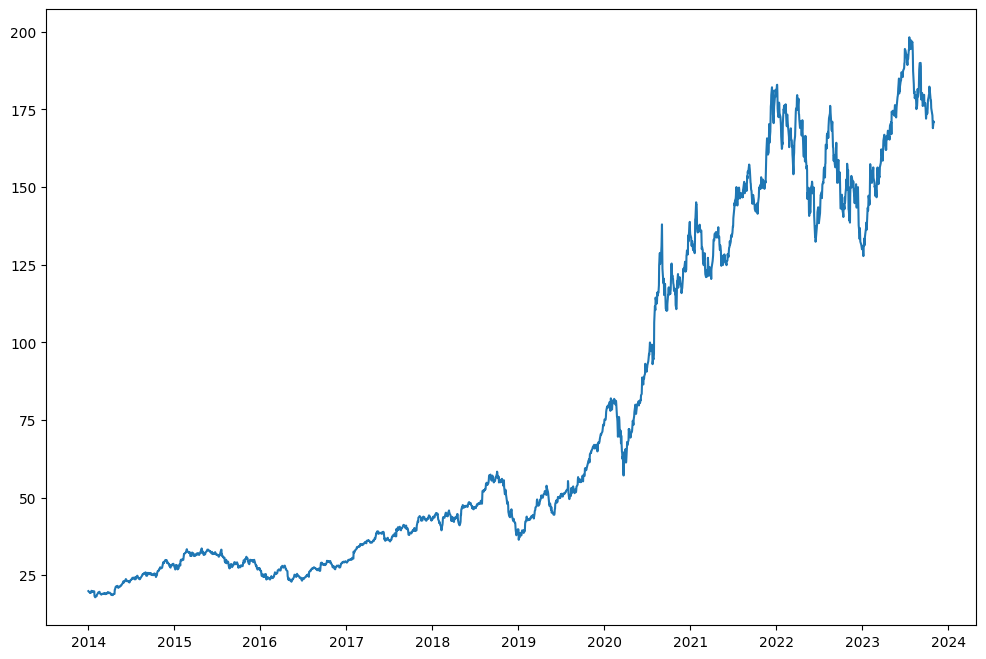

In [13]:

plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['High'])
plt.show()

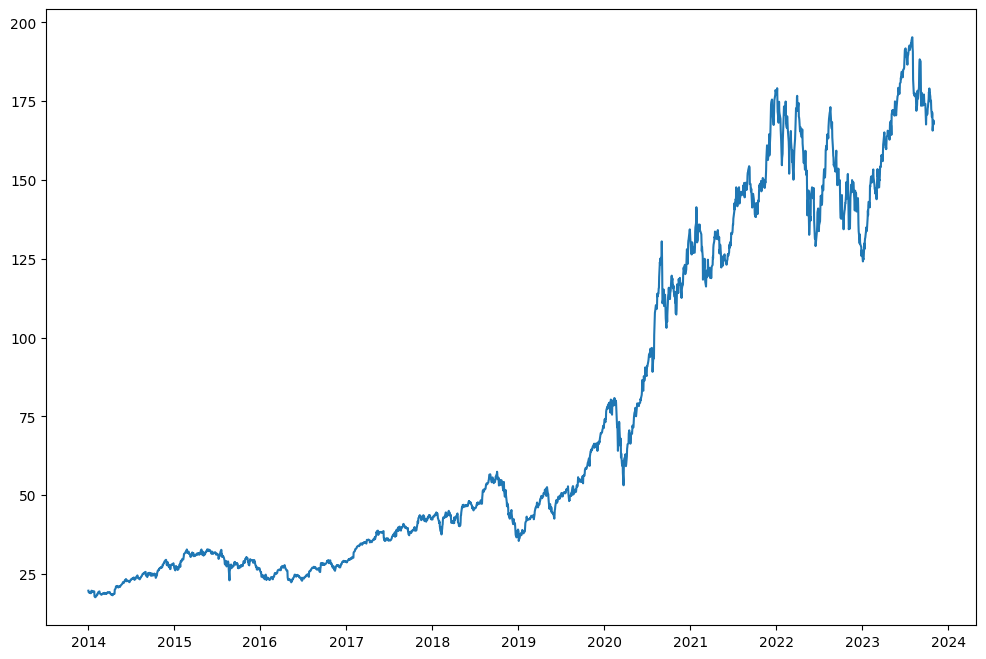

In [14]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Low'])
plt.show()

<Axes: >

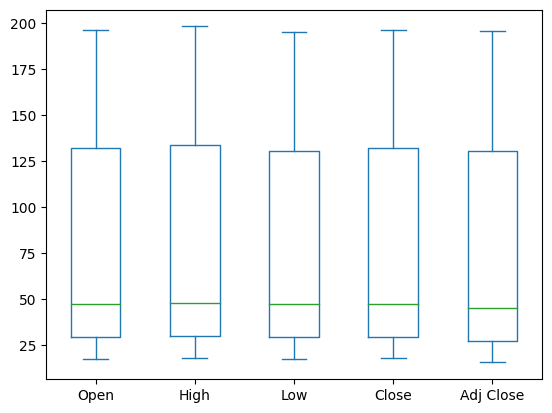

In [15]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

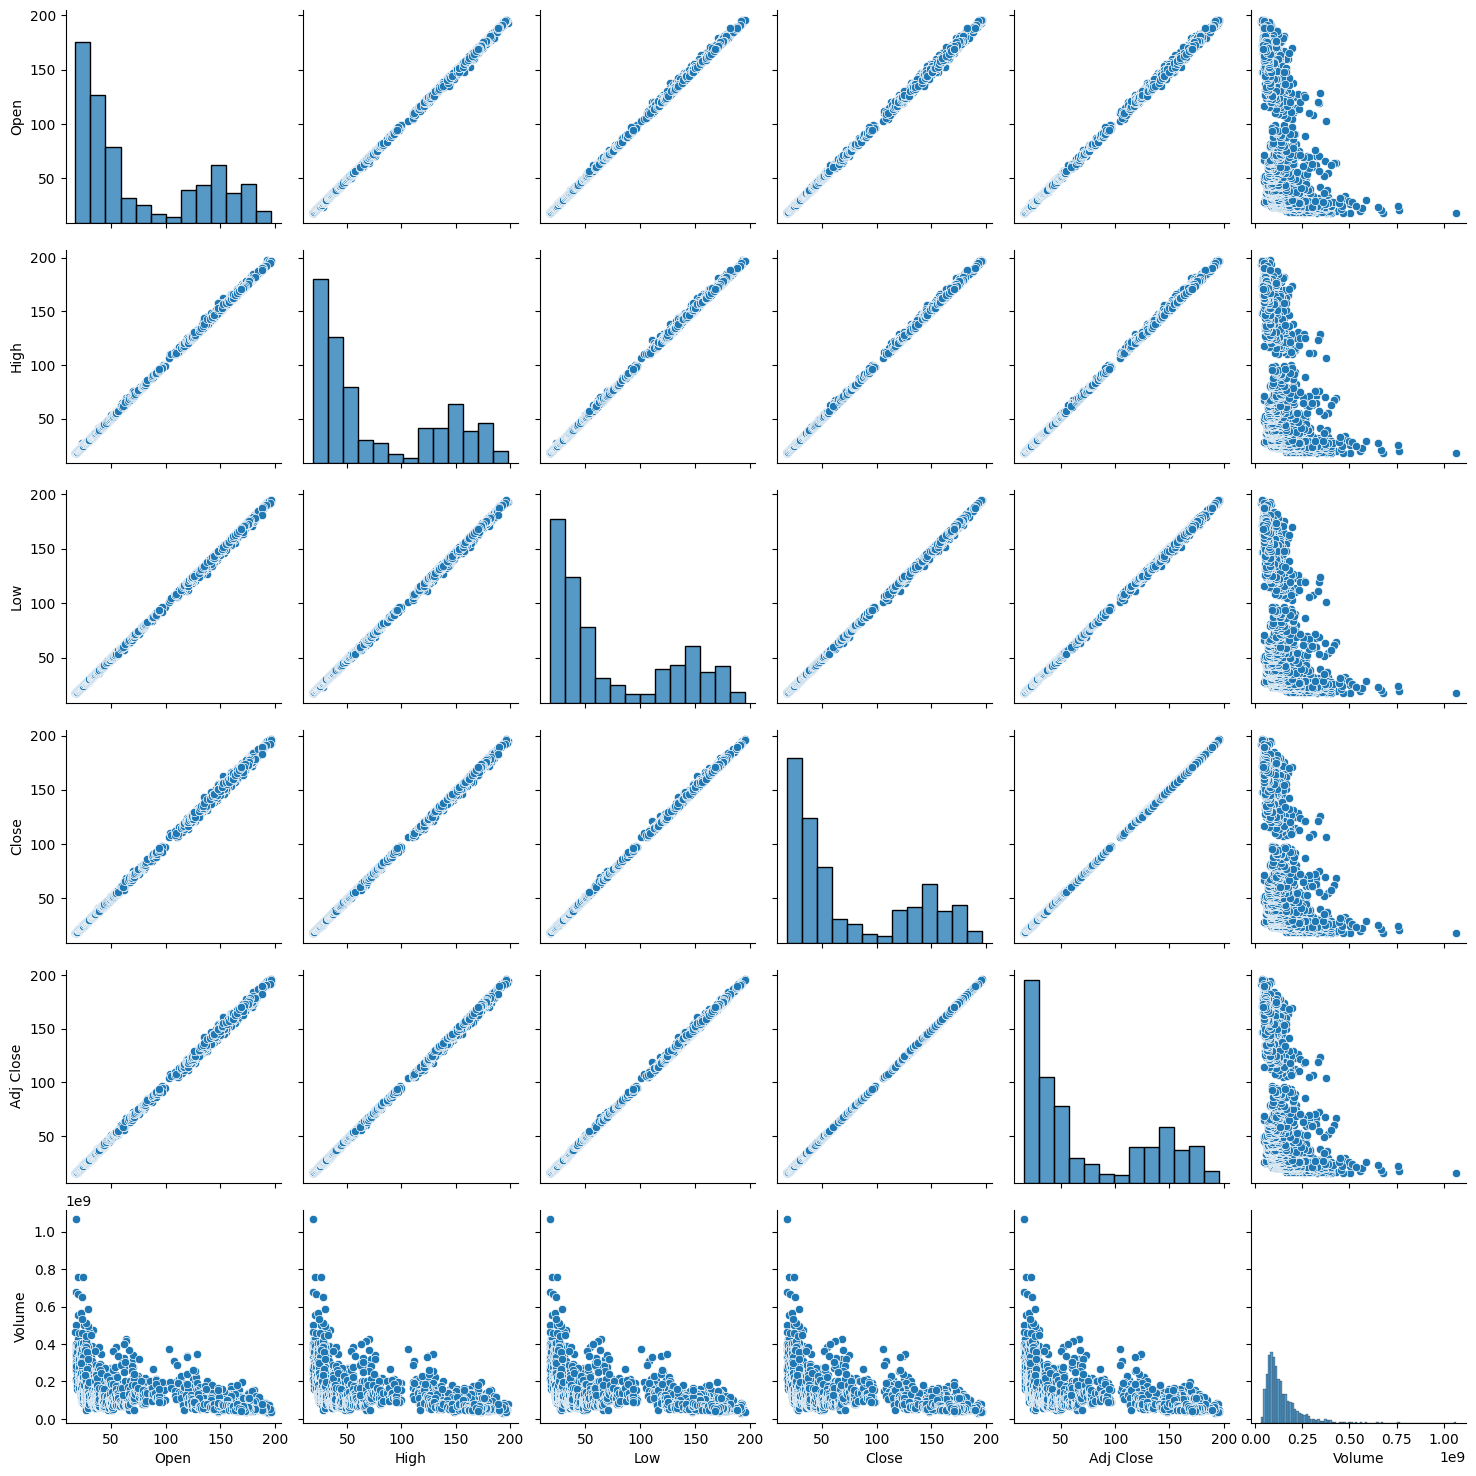

In [16]:
sns.pairplot(data)

In [17]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999870,0.999841,0.999670,0.999634,-0.481662
High,0.999870,1.000000,0.999811,0.999843,0.999803,-0.479023
Low,0.999841,0.999811,1.000000,0.999850,0.999822,-0.485234
Close,0.999670,0.999843,0.999850,1.000000,0.999964,-0.482402
Adj Close,0.999634,0.999803,0.999822,0.999964,1.000000,-0.483767
Volume,-0.481662,-0.479023,-0.485234,-0.482402,-0.483767,1.000000


<Axes: >

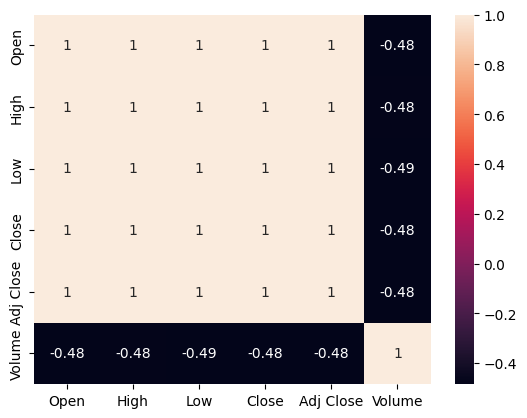

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
layout=go.Layout(
    title='Stock Price of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)
apple_data=[{'x':data['Date'],'y':data['Close']}]
plot=go.Figure(data=apple_data,layout=layout)

In [20]:
plot.show(renderer="colab")

# **Time series decomposition plot.**

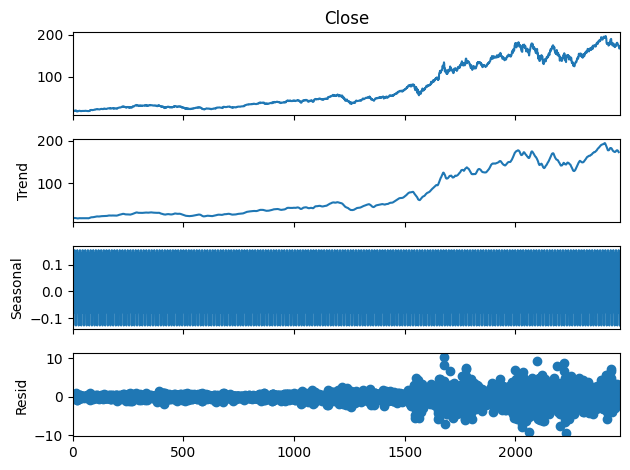

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Close,period=12)
decompose_ts_add.plot()
plt.show()

# **ACF Plot**

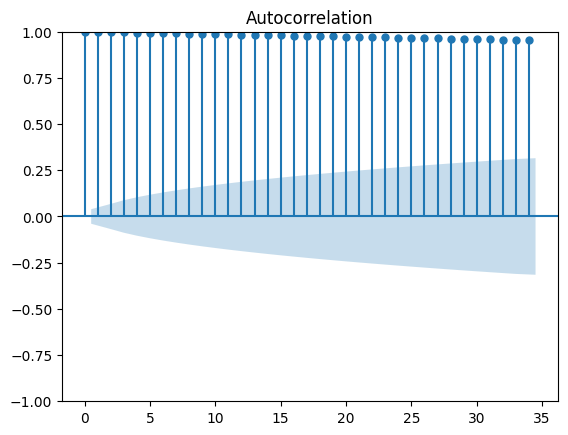

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(data["Close"])

# **PACF Plot**

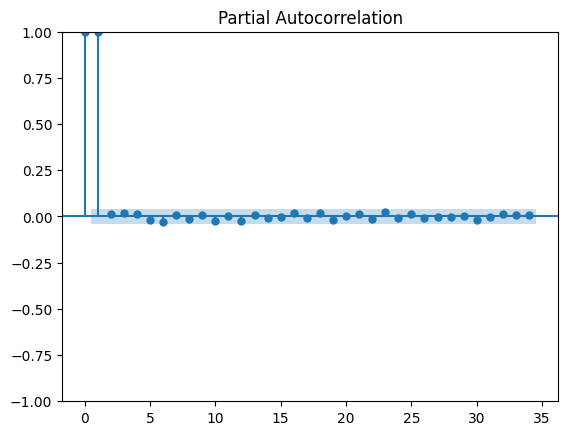

In [23]:
pacf = plot_pacf(data["Close"])

In [ ]:
#data.set_index('Date',inplace=True)

In [ ]:
#data.head()

## **Splitting Data into Train and Test**

In [27]:
train_data=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
test_data=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [28]:
train_data.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409287


In [29]:
test_data.head()

,Close
1732,119.389999
1733,118.029999
1734,118.639999
1735,117.339996
1736,113.849998


In [30]:
print(train_data.shape)
print(test_data.shape)

(1732, 1)
(743, 1)


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
data_training=scaler.fit_transform(train_data)

In [36]:
data_training

array([[0.0163788 ],
       [0.01264868],
       [0.01355434],
       ...,
       [0.8713152 ],
       [0.87174504],
       [0.88068508]])

## **Creating x_train and y_train**

In [40]:
x_train=[]
y_train=[]

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100: i])
    y_train.append(data_training[i, :])

x_train, y_train= np.array(x_train),np.array(y_train)

In [41]:
print(x_train.shape)
print(y_train.shape)

(1632, 100, 1)
(1632, 1)


# **Creating Model**

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import keras.backend as K

In [43]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=1)

51/51 [==============================] - 22s 344ms/step - loss: 0.0296


In [46]:
model.save('Apple_Stock')

In [47]:
test_data.head()

,Close
1732,119.389999
1733,118.029999
1734,118.639999
1735,117.339996
1736,113.849998


In [48]:
train_data.tail(100)

,Close
1632,88.407501
1633,90.445000
1634,91.199997
1635,91.027496
1636,91.027496
...,...
1727,115.970001
1728,119.489998
1729,119.209999
1730,119.260002


In [49]:
past_100_days=train_data.tail(100)

In [50]:
final_df=past_100_days.append(test_data, ignore_index=True)

In [51]:
input_data=scaler.fit_transform(final_df)

In [52]:
input_data.shape

(843, 1)

In [53]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, :])

In [54]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(743, 100, 1)
(743, 1)


In [55]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 3s 83ms/step


In [56]:
y_predicted.shape

(743, 100, 1)

In [ ]:
#y_predicted_final = y_predicted[:, -1, :].squeeze()

In [57]:
y_predicted_final = y_predicted[:, -1, :]

In [58]:
y_predicted_final.shape

(743, 1)

In [59]:
test_predict=scaler.inverse_transform(y_predicted_final)

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_predicted_final))

0.15736781857037047

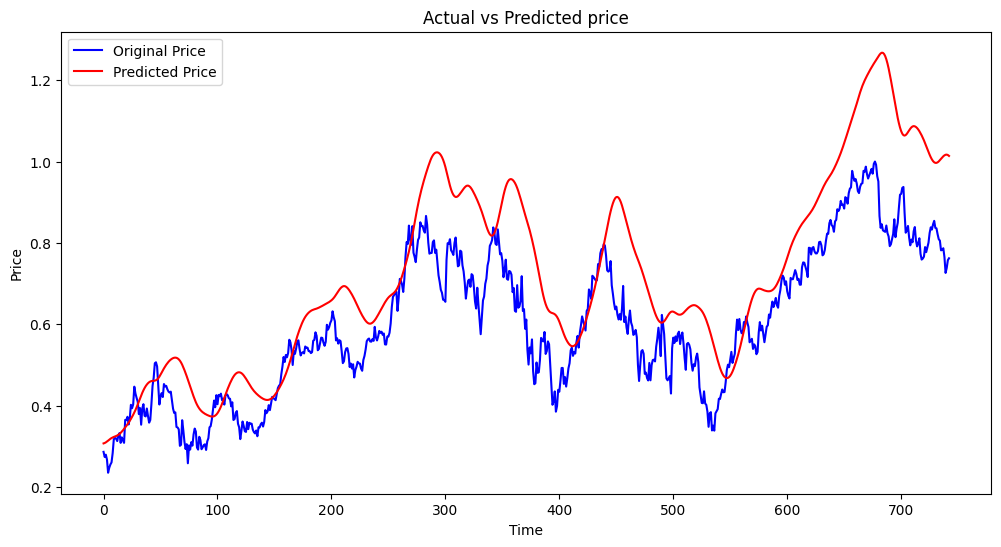

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted_final,'r',label='Predicted Price')
plt.title('Actual vs Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()